In [10]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
df = pd.DataFrame({'cofee':[
180.5,
178.8,
176.2,
177.1,
178.75,
179.25,
175.4,
178.2,
177.25,
177.5,
179.9,
180.8,
177.75,
179.5,
179.25,
178.5,
178.8,
178.5,
176.5,
178.76,
181.6
]})

#mean=df.mean()
#median=df.median()
#std=df.std()
print(std)

0    1.53892
dtype: float64


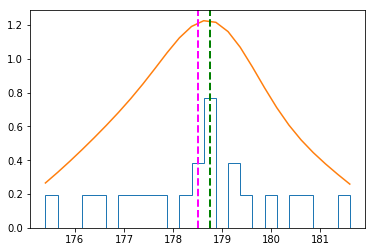

In [13]:
cofee=df['cofee']
density = stats.gaussian_kde(cofee)
n, x, _ = plt.hist(cofee, histtype='step', normed=True, bins=25)  
plt.plot(x, density(x)*5)
plt.axvline(cofee.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(cofee.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

In [32]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd 
import numpy as np
from statsmodels.api import datasets

# import some data to play with
iris = datasets.get_rdataset('iris')
iris.data.columns= ['Sepal Length', 'Sepal Width','Petal Length','Petal Width','Species']

#df = pd.DataFrame(iris, columns = ['Sepal Length', 'Sepal Width','Petal Length','Petal Width']) 

#df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                     columns= iris['feature_names'] + ['target'])
#df.describe()

#print(df.data[:,:2])
iris.data.head()





,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
iris.data['count']=1
iris.data[['Species','count']].groupby('Species').count()

,count
Species,
setosa,50
versicolor,50
virginica,50


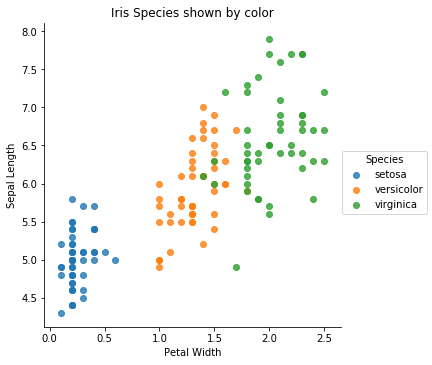

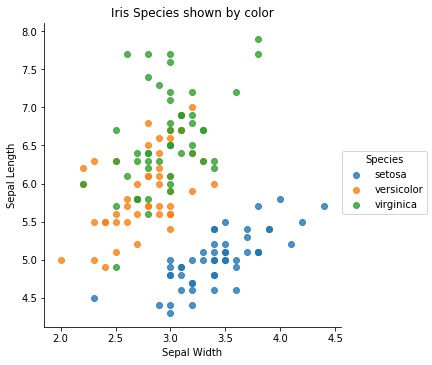

In [46]:
%matplotlib inline

def plot_iris(iris,col1,col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    sns.lmplot(x=col1, y=col2, data=iris,hue='Species',fit_reg=False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris Species shown by color')
    plt.show()
    

plot_iris(iris.data,"Petal Width",'Sepal Length')    
plot_iris(iris.data,"Sepal Width",'Sepal Length')    
    

In [49]:
from sklearn.preprocessing import scale
import pandas as pd

columns = ['Sepal Length', 'Sepal Width','Petal Length','Petal Width']
iris_scaled=scale(iris.data[columns])
iris_scaled=pd.DataFrame(iris_scaled,columns=columns)

iris_scaled.describe().round(3)

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


In [51]:
levels={'setosa':0,'versicolor':1,'virginica':2}

iris_scaled['Species']=  [levels[x] for x in iris.data['Species']]
iris_scaled.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [59]:
from sklearn.model_selection import train_test_split

import numpy as np

np.random.seed(3456)

split_data=train_test_split(np.asmatrix(iris_scaled),test_size=75)

train_features=split_data[0][:,:4]
train_labels= np.ravel(split_data[0][:,4])
test_features=split_data[1][:,:4]
test_labels= np.ravel(split_data[1][:,4])

print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(75, 4)
(75,)
(75, 4)
(75,)


In [66]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_features,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [69]:
iris_test=pd.DataFrame(test_features,columns=columns)
iris_test['predict']=model.predict(test_features)
iris_test['correct']=[1 if z==x else 0 for  x,z in zip(iris_test['predict'],test_labels)]

accuracy = 100.00 * (float(sum(iris_test['correct']))/float(iris_test.shape[0]))
print(accuracy)

96.0


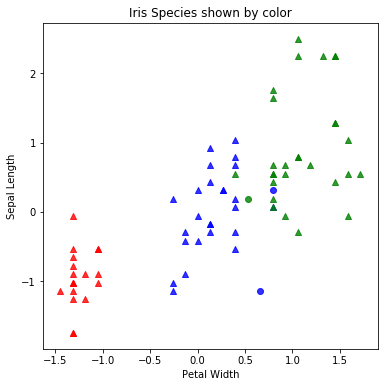

In [92]:
def plot_scatter(iris,col1,col2):
    import seaborn as sns
    import matplotlib.pyplot as plt
    marker = {0:'o',1:'^'}
    ax=plt.figure(figsize=(6,6)).gca()
    colors ={0:'red',1:'blue',2:'green'}
    for i in marker:
        for c in colors:
            temp = iris[(iris['correct']==i) & (iris['predict']==c)]
            sns.regplot(x=col1, y=col2, data=temp,fit_reg=False,marker=marker[i],ax=ax, scatter_kws={'color':colors[c]})
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris Species shown by color')
    plt.show()

#iris['Species']=test_labels
plot_scatter(iris_test,"Petal Width","Sepal Length")

In [71]:
# The below plots can be used for cotinous or regression visualisation
def plot_hist(data,colx,coly,bins=10):
    fig=plt.figure(figsize=(6,6))
    ax=fig.gca()
    data.plot.hist(ax=ax,bins=bins)
    ax.set_xlable(colx)
    ax.set_ylable(coly)
    plt.show()
    

In [75]:
#Kernal density histogram plot

def plot_hist_density(data,colx,coly,bins=10,hist=False):
    sns.set_style('whitegrid')
    sns.distplot(data,bins=bins,rugs=true,hist=hist)
    plt.xlable(colx)
    plt.ylable(coly)
    plt.show()

In [76]:
#2d density lots with seaborn
def plot_density_2d(data,colx,coly,bins=10,kind='kde'):
    sns.set_style('whitegrid')
    sns.jontplot(data,bins=bins,rugs=true,hist=hist,kind=kind)
    plt.xlable(colx)
    plt.ylable(coly)
    plt.show()